<a href="https://colab.research.google.com/github/shuhbam199/FebGithub/blob/main/NN_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case


**Axis** bank is trying to categorize its customers for better advertising their Credit Card Service and have more number of customers rolling for the service.
classify the customers based on their expentidures, family size, age, marital status

<br>




In [ ]:
!gdown 1zaomtZNajRwWaQTeysXoshZA4fFX5t-d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **ID** | ID of the Customer|
|02| **Gender** | Customer is a Male or Female |
|03|**Ever_Married**|Customer is married or not |
|04|**Age**|Age of the Customer|
|05|**Graduated**|Customer has graduated or not|
|06|**Profession**|Profession of Customer|
|07|**Work_Experience**|Work Exp of Customer, ranges from (0-14) |
|08|**Spending_Score**| Customer Expenditure scores |
|09|**Family_Size**|Family size of the Customer, ranges from (1-9)|
|10|**Var_1**|Categorizing Customers as (Cat_1,Cat_2,Cat_3,Cat_4)|
|11|**Segmentation**|Categorizing Customers as (A,B,C,D)|





**Note:** Profession of Customer includes :

- Artist, Doctor, Engineer, Entertainment, Executive, Healthcare , Homemaker , Lawyer , Marketing

In [ ]:
df = pd.read_csv('customer_train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**observe**

Since Segmentation and Var_1 says the same thing, we can drop either one of them:
- Dropping Var_1
- Also Dropping ID

In [ ]:
df.drop(columns=['Var_1','ID'],inplace = True)

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


**Observe**

There are Null values in the data

Dropping all the null values

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

With all the null values removed, lets check the shape of the dataset

Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 6718 | 9 |

In [ ]:
df.shape

(6718, 9)

# EDA

Lets check all the **categorical data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


In [ ]:
#storing class label
Y = df['Segmentation']
df = pd.get_dummies(df, columns = ['Segmentation'])

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0,0,0,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,0,1,0,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0,1,0,0
5,Male,Yes,56,No,Artist,0.0,Average,2.0,0,0,1,0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0,0,1,0



We can apply any Encoding Stratergy:
 ```OneHot Encoding```

In [ ]:
X = df.drop(columns=['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D'])

y = df[['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D']]

In [ ]:
X = pd.get_dummies(X, columns = ['Gender','Ever_Married','Graduated', 'Profession','Spending_Score'])

X.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


Lets Split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (5441, 21) (5441, 4)
Validation: (605, 21) (605, 4)
Test  :  (672, 21) (672, 4)


**Observe**

We use 10% of the data as test and validation set respectively
- The remaining data is used for train

Also recall from Hyperparameter tuning lecture:
-  The importance of standardization as it helps
- the model to reach global minima faster



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Baseline Model


- Lets create a simple 6 layered base model




In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(16, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(8, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(4,activation='softmax')])
  return model

In [ ]:
model = create_baseline()

Using ```Adam``` as Optimizer, and metrices as Precision and Recall
- Since Accuracy is not the right metric in Multi-Class setting  

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['Precision','Recall']  )


Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
43/43 [==============================] - 4s 13ms/step - loss: 1.3399 - precision: 0.8319 - recall: 0.0182 - val_loss: 1.2726 - val_precision: 0.7162 - val_recall: 0.0876
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.2237 - precision: 0.7263 - recall: 0.1336 - val_loss: 1.1775 - val_precision: 0.6727 - val_recall: 0.1223
Epoch 3/10
43/43 [==============================] - 0s 5ms/step - loss: 1.1491 - precision: 0.7065 - recall: 0.2182 - val_loss: 1.1193 - val_precision: 0.6813 - val_recall: 0.2826
Epoch 4/10
43/43 [==============================] - 0s 5ms/step - loss: 1.0931 - precision: 0.6887 - recall: 0.3025 - val_loss: 1.0890 - val_precision: 0.7143 - val_recall: 0.2893
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0673 - precision: 0.6827 - recall: 0.3231 - val_loss: 1.0751 - val_precision: 0.6889 - val_recall: 0.3074
Epoch 6/10
43/43 [==============================] - 0s 5ms/step - loss: 1.0546 - precision: 0.6747 

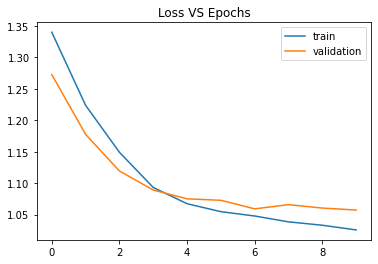

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



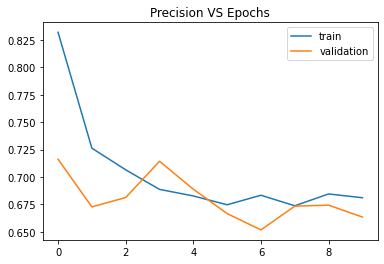

In [ ]:
epochs = history.epoch
precision = history.history["precision"]
val_precision = history.history["val_precision"]


plt.plot(epochs, precision, label="train")
plt.plot(epochs, val_precision, label="validation")

plt.legend()
plt.title("Precision VS Epochs")

plt.show()



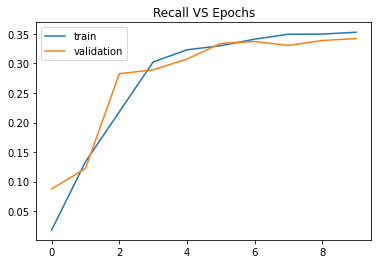

In [ ]:
epochs = history.epoch
recall = history.history["recall"]
val_recall = history.history["val_recall"]


plt.plot(epochs, recall, label="train")
plt.plot(epochs, val_recall, label="validation")

plt.legend()
plt.title("Recall VS Epochs")

plt.show()



**Observe**

After 10 epochs:
- the model still having a high loss
- Along with that Precision is 68 %

The only thing the model improved upon:
- Is on the Recall which reached 35 %




- implement F1 Score


In [ ]:
!pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.6 MB/s 


In [ ]:
import tensorflow_addons as tfa


Using F1 score as metrics

In [ ]:
model = create_baseline()

f1 = tfa.metrics.F1Score(4,'micro')

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[f1]  )


training model for 10 epochs with batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
43/43 [==============================] - 1s 9ms/step - loss: 1.3087 - f1_score: 0.3721 - val_loss: 1.2346 - val_f1_score: 0.3917
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.1930 - f1_score: 0.4367 - val_loss: 1.1576 - val_f1_score: 0.4678
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 1.1337 - f1_score: 0.5207 - val_loss: 1.1073 - val_f1_score: 0.5157
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0984 - f1_score: 0.5315 - val_loss: 1.0940 - val_f1_score: 0.5058
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0752 - f1_score: 0.5381 - val_loss: 1.0825 - val_f1_score: 0.5041
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0633 - f1_score: 0.5391 - val_loss: 1.0690 - val_f1_score: 0.5339
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0536 - f1_score: 0.5464 - val_loss: 1.0569 - val_f1_score: 0.5223
Epoch 8/10
43/43 [==

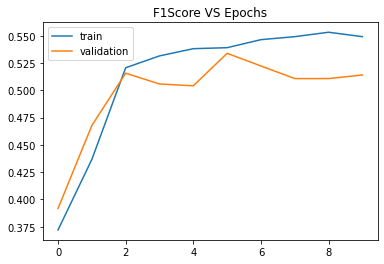

In [ ]:
epochs = history.epoch
f1_score = history.history["f1_score"]
val_f1_score = history.history["val_f1_score"]


plt.plot(epochs, f1_score, label="train")
plt.plot(epochs, val_f1_score, label="validation")

plt.legend()
plt.title("F1Score VS Epochs")

plt.show()



**Observe**

Just by using F1Score, we can better understand that
- the model performance much clearly




<br>

With this lets check the performance of the model on the test data


In [ ]:
import sklearn

from sklearn.metrics import f1_score

In [ ]:
y_pred = model.predict(X_test)

# y_test was One hot Encoded , y_pred had probabilities,
# Hence converting them to labels for MultiClass F1 Calculation
f1_score(np.argmax(y_test.values,axis=1),np.argmax(y_pred,axis=1),average='micro')

21/21 [==============================] - 0s 2ms/step


0.5089285714285714